In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import geopandas as gpd
import descartes
from shapely.geometry import Point , Polygon

import folium
from folium import plugins
import json


In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import helper as H
import plot_helper as P

In [3]:
# read 2 rows of the file before loading it
!head -2 ../data/incident_reports.csv

Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140,VS,Vehicle Supplement,,07041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000,Southern,Bayview Hunters Point,10,37.72171587946975,-122.39594382884452,"(37.72171587946975, -122.39594382884452)"


In [4]:
police_df = pd.read_csv('../data/incident_reports.csv')

In [5]:
police_df.head(2)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140.0,...,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000.0,Southern,Bayview Hunters Point,10.0,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01 02:30:00 AM,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,180000768,180010668.0,...,"Burglary, Residence, Forcible Entry",Open or Active,LISBON ST \ PERSIA AVE,21719000.0,Ingleside,Excelsior,11.0,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


In [6]:
# replace NaN values with 0
police_df= police_df.fillna(0)

In [7]:
unwanted= ['Incident Datetime', 'Report Type Code' , 'Report Type Description' , 'CAD Number' , 'CNN', 
                              'Supervisor District' , 'Resolution', 'Filed Online', 'Incident Number',
                              'Incident Code' , 'Police District']
extract= H.extract_df(police_df, unwanted)

In [8]:
extract.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


In [9]:
extract = H.to_datetime(extract,'Incident Date' , 'Incident Time')

In [10]:
extract.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,1900-01-01 09:26:00,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018-01-01,1900-01-01 02:30:00,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


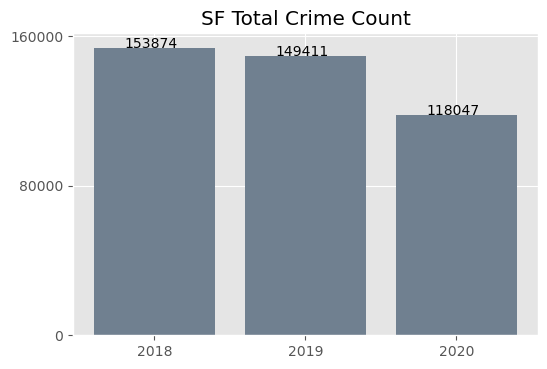

In [11]:
H.plot_crime_per_year(extract, [2018,2019, 2020], 'Incident Year');

In [12]:
df_2018 = H.crime_per_year(extract, 2018, 'Incident Year')

In [13]:
df_2019 = H.crime_per_year(extract , 2019, 'Incident Year')

In [14]:
df_2020 = H.crime_per_year(extract , 2020, 'Incident Year')

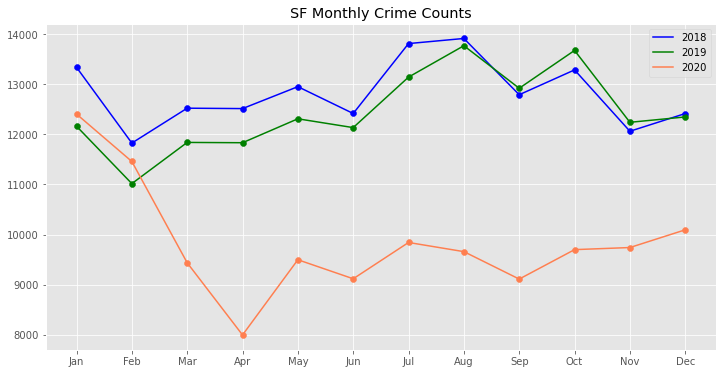

In [20]:
# plotting crime per month
P.plot_crime_by_month(extract , 'Incident Date');

In [ ]:
# counts per category for each year (3 subplots)

In [ ]:
# comparing 3 years , voilent vs property

In [61]:
grouped = extract.groupby([extract['Incident Date'].dt.year, extract['Incident Category']]).count()

In [68]:
df_20= extract[extract['Incident Date'].dt.year == 2020].groupby('Incident Category').count().sort_values(by= 'Row ID' , ascending = False).reset_index()

In [69]:
df_20

,Incident Category,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Larceny Theft,30396,30396,30396,30396,30396,30396,30396,30396,30396,30396,30396,30396,30396,30396
1,Burglary,9138,9138,9138,9138,9138,9138,9138,9138,9138,9138,9138,9138,9138,9138
2,Malicious Mischief,8717,8717,8717,8717,8717,8717,8717,8717,8717,8717,8717,8717,8717,8717
3,Other Miscellaneous,8471,8471,8471,8471,8471,8471,8471,8471,8471,8471,8471,8471,8471,8471
4,Motor Vehicle Theft,7520,7520,7520,7520,7520,7520,7520,7520,7520,7520,7520,7520,7520,7520
5,Assault,6945,6945,6945,6945,6945,6945,6945,6945,6945,6945,6945,6945,6945,6945
6,Non-Criminal,6824,6824,6824,6824,6824,6824,6824,6824,6824,6824,6824,6824,6824,6824
7,Recovered Vehicle,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644
8,Fraud,3411,3411,3411,3411,3411,3411,3411,3411,3411,3411,3411,3411,3411,3411
9,Warrant,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225,3225


In [40]:
test = grouped.loc[2018 , 'Row ID']

In [42]:
type(test)

pandas.core.series.Series

In [48]:
grouped

Incident Date  Incident Time  \
Incident Date Incident Category                                    
2018          0                                15             15   
              Arson                           366            366   
              Assault                        9051           9051   
              Burglary                       7107           7107   
              Case Closure                    740            740   
...                                           ...            ...   
2021          Vehicle Misplaced                 2              2   
              Warrant                         626            626   
              Weapons Carrying Etc            206            206   
              Weapons Offence                   1              1   
              Weapons Offense                 270            270   

                                    Incident Year  Incident Day of Week  \
Incident Date Incident Category                                           
2018          0                                15                    15   
              Arson                           366                   366   
              Assault                        9051                  9051   
              Burglary                       7107                  7107   
              Case Closure                    740                   740   
...                                           ...                   ...   
2021          Vehicle Misplaced                 2                     2   
              Warrant                         626                   626   
              Weapons Carrying Etc            206                   206   
              Weapons Offence                   1                     1   
              Weapons Offense                 270                   270   

                                    Report Datetime  Row ID  Incident ID  \
Incident Date Incident Category                                            
2018          0                                  15      15           15   
              Arson                             366     366          366   
              Assault                          9051    9051         9051   
              Burglary                         7107    7107         7107   
              Case Closure                      740     740          740   
...                                             ...     ...          ...   
2021          Vehicle Misplaced                   2       2            2   
              Warrant                           626     626          626   
              Weapons Carrying Etc              206     206          206   
              Weapons Offence                     1       1            1   
              Weapons Offense                   270     270          270   

                                    Incident Subcategory  \
Incident Date Incident Category                            
2018          0                                       15   
              Arson                                  366   
              Assault                               9051   
              Burglary                              7107   
              Case Closure                           740   
...                                                  ...   
2021          Vehicle Misplaced                        2   
              Warrant                                626   
              Weapons Carrying Etc                   206   
              Weapons Offence                          1   
              Weapons Offense                        270   

                                    Incident Description  Intersection  \
Incident Date Incident Category                                          
2018          0                                       15            15   
              Arson                                  366           366   
              Assault                               9051          9051   
              Burglary             

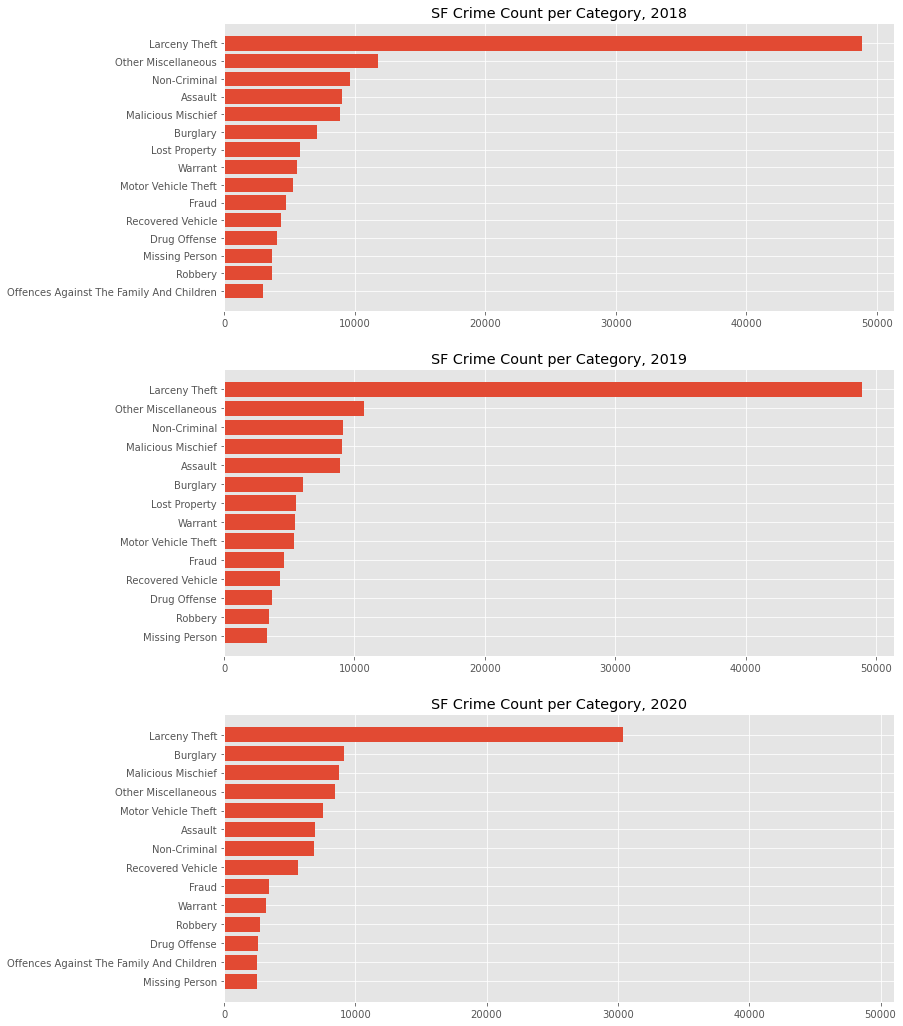

In [84]:
P.plot_cats_per_year(extract , 'Incident Date', 'Incident Category');